# Dart Throwers

Four people throw darts at a dart board. Use the location of labelled darts to predict who threw the unlabelled ones.

In [1]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

data = pd.read_csv('data/train.csv').append(pd.read_csv('data/test.csv'))
data.head()

,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate


In [2]:
throwers = data['Competitor'].unique()
throwers_map = {thrower: i for thrower, i in zip(throwers, range(4))}

data = data.replace(throwers_map)

throwers_map

{'Bob': 0, 'Sue': 1, 'Kate': 2, 'Mark': 3}

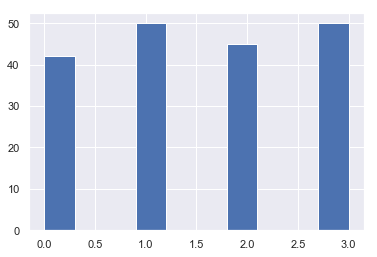

In [3]:
plt.hist(data['Competitor'].values);

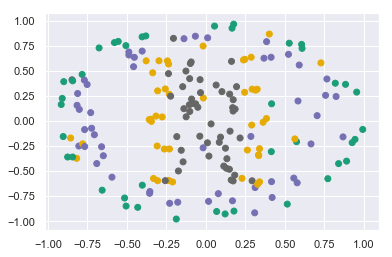

In [4]:
X1, X2, y = data['XCoord'], data['YCoord'], data['Competitor']

plt.scatter(X1, X2, cmap='Dark2', c=y);

The data is inseparable. Let's try to create a new data column called `Distfrom0` which is the distance from the center.

In [5]:
data['Distfrom0'] = np.sqrt(X1.values**2 + X2.values**2)
X3 = data['Distfrom0']
data.head()

,ID,XCoord,YCoord,Competitor,Distfrom0
0,111,0.943354,-0.184819,0,0.961288
1,92,0.121557,-0.927656,0,0.935586
2,20,0.818485,0.375437,0,0.900483
3,75,0.867462,-0.159851,1,0.882067
4,10,-0.817321,-0.373419,2,0.898585


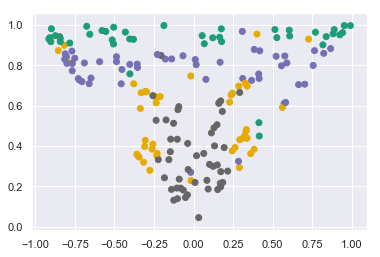

In [6]:
plt.scatter(X1, X3, cmap='Dark2', c=y);

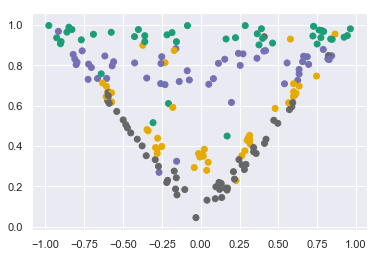

In [7]:
plt.scatter(X2, X3, cmap='Dark2', c=y);

Still not easy but somewhat better.

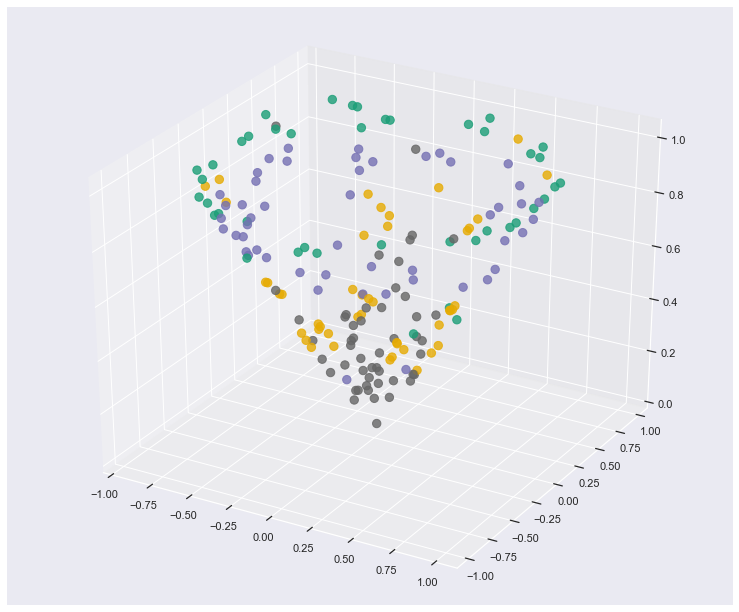

In [8]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(13, 11))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(X1, X2, X3, s=70, c=y, cmap='Dark2', alpha=.8);

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(np.c_[X2.values, X3.values], y.values, test_size=.1, random_state=706)
rfc = RandomForestClassifier(n_estimators=10, max_depth=100).fit(X_train, y_train)

print('RandomForestClassifier', 'Accuracy on train set:', round(np.mean(rfc.predict(X_train) == y_train), 3))
print('RandomForestClassifier', 'Accuracy on test set:', round(np.mean(rfc.predict(X_test) == y_test), 3))

RandomForestClassifier Accuracy on train set: 0.988
RandomForestClassifier Accuracy on test set: 0.947


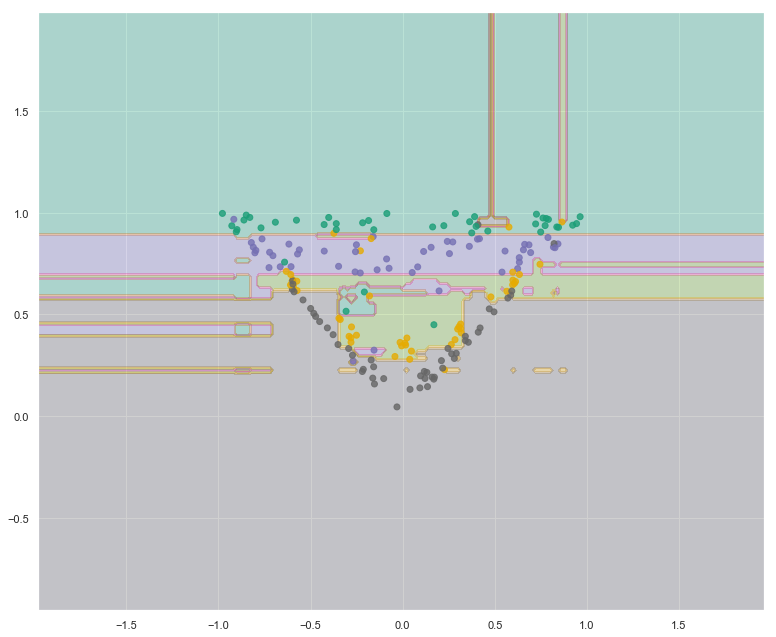

In [31]:
xx_ = np.arange(X2.values.min() - 1, X2.values.max() + 1, .02)
yy_ = np.arange(X3.values.min() - 1, X3.values.max() + 1, .02)
xx, yy = np.meshgrid(xx_, yy_)

zz = rfc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(13, 11))
plt.contourf(xx, yy, zz, cmap='Dark2', alpha=0.3);
plt.scatter(X2, X3, cmap='Dark2', c=y, alpha=.8);